# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [26]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [48]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
html = browser.html
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [49]:
# Create a Beautiful Soup Object
soup = bs(html, 'html.parser')

In [50]:
# Extract all rows of data
data_elements = soup.find_all('tr', class_="data-row")
print(data_elements)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [51]:
# Create an empty list
data_list= []
row_headings_list = ['id','Terrestrial Date', 'Sols', 'Solar Longitude','Month','Minimum Temperature','Atmospheric Pressure']
# Loop through the scraped data to create a list of rows
for elements in data_elements:
    td = elements.find_all('td')
    row = [col.text for col in td]
    data_list.append(row)
    

print(data_list)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [52]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_list, columns =['id','Terrestrial Date', 'Sols', 'Solar Longitude','Month','Minimum Temperature','Atmospheric Pressure'] )

In [53]:
# Confirm DataFrame was created successfully
df

,id,Terrestrial Date,Sols,Solar Longitude,Month,Minimum Temperature,Atmospheric Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [54]:
# Examine data type of each column
datatypes = df.dtypes
print(datatypes)

id                      object
Terrestrial Date        object
Sols                    object
Solar Longitude         object
Month                   object
Minimum Temperature     object
Atmospheric Pressure    object
dtype: object


In [55]:
# Change data types for data analysis
clean_df = df.astype({'Terrestrial Date': 'datetime64[ns]', 'Sols' : 'int64','Solar Longitude': 'int64', 'Month' :'int64', 'Minimum Temperature': 'float64', 'Atmospheric Pressure' : 'float64'})

In [56]:
# Confirm type changes were successful by examining data types again
clean_df.dtypes

id                              object
Terrestrial Date        datetime64[ns]
Sols                             int64
Solar Longitude                  int64
Month                            int64
Minimum Temperature            float64
Atmospheric Pressure           float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [57]:
# 1. How many months are there on Mars?
month_df= clean_df['Month']
month_df.unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

In [58]:
# 2. How many Martian days' worth of data are there?
daysonmars_df = clean_df['Sols']
daysonmars_df.max()

1977

In [69]:
# 3. What is the average low temperature by month?
monthly_min_temp_df = clean_df[['Month','Minimum Temperature']]
minimum_temp = monthly_min_temp_df.groupby('Month', as_index=False)['Minimum Temperature'].mean()

<Axes: xlabel='Month'>

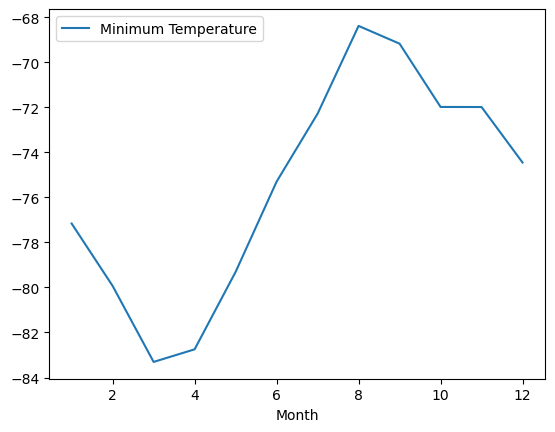

In [79]:
# Plot the average temperature by month
minimum_temp.plot(x = 'Month', y='Minimum Temperature', kind = 'line')

In [84]:
# Identify the coldest and hottest months in Curiosity's location
monthly_min_temp_df.groupby('Month', as_index=False)['Minimum Temperature'].max()

,Month,Minimum Temperature
0,1,-62.0
1,2,-76.0
2,3,-77.0
3,4,-77.0
4,5,-74.0
5,6,-71.0
6,7,-65.0
7,8,-63.0
8,9,-63.0
9,10,-66.0


In [85]:
monthly_min_temp_df.groupby('Month', as_index=False)['Minimum Temperature'].min()

,Month,Minimum Temperature
0,1,-82.0
1,2,-86.0
2,3,-90.0
3,4,-89.0
4,5,-85.0
5,6,-84.0
6,7,-78.0
7,8,-75.0
8,9,-78.0
9,10,-81.0


In [95]:
# 4. Average pressure by Martian month
monthly_pressure = clean_df[['Month','Atmospheric Pressure']]
mean_monthly_pressure = monthly_pressure.groupby('Month', as_index=False)['Atmospheric Pressure'].mean()


<Axes: xlabel='Month'>

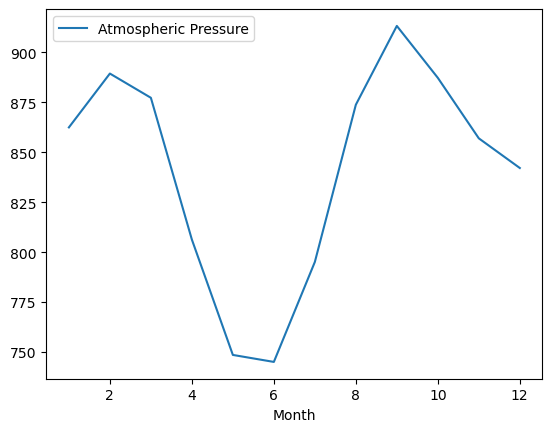

In [96]:
# Plot the average pressure by month
mean_monthly_pressure.plot(x = 'Month', y='Atmospheric Pressure', kind = 'line')

In [44]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [97]:
# Write the data to a CSV
clean_df.to_csv('Martian Data')

In [98]:
browser.quit()